In [1]:
from collections import OrderedDict
import pandas as pd

design_outputs = OrderedDict()

## Wind Only

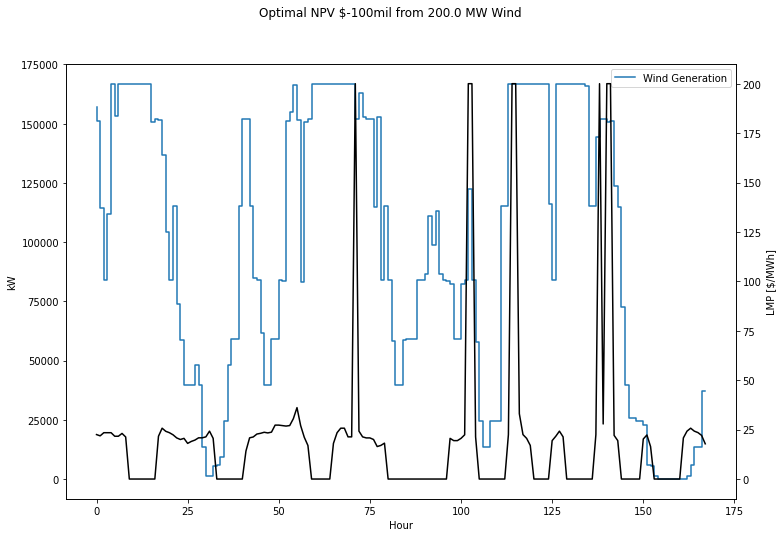

Wind MW:  200.0
elec Rev $:  263976.690506011
NPV $: -99985625.1538023


In [2]:
from dispatches.models.renewables_case.wind_LMP import wind_optimize

wind_mw, rev, NPV = wind_optimize()

design_outputs['Wind'] = {
    'NPV': NPV, 'Rev_E': rev, 'wind_mw': wind_mw
}

## Wind + PEM

Assuming existing wind farm of 200 MW

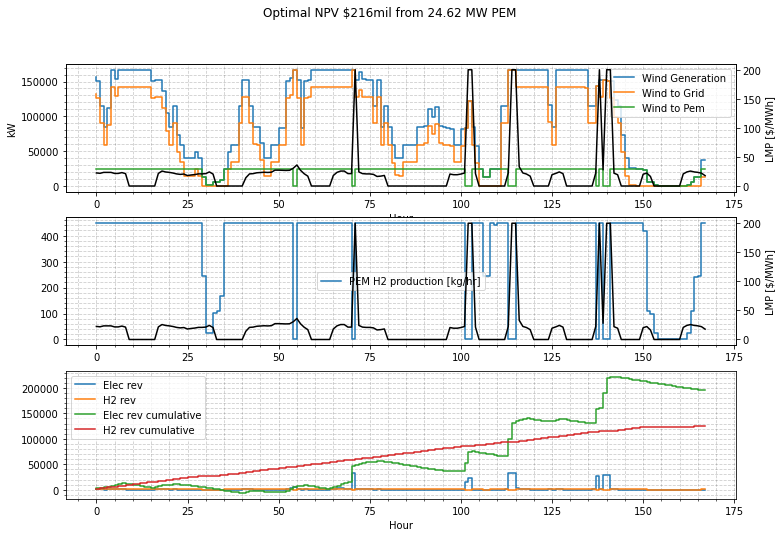

wind mw 200.0
pem mw 24.619502662772167
h2 rev 125817.07972233128
elec rev 194901.99665151635
npv 216242601.99677283


In [3]:
from dispatches.models.renewables_case.wind_PEM_LMP import wind_pem_optimize

wind_mw, pem_mw, rev_h, rev_e, NPV = wind_pem_optimize()

design_outputs['Wind + PEM'] = {
    'Rev_E': rev_e, 'NPV': NPV, 'Rev_H': rev_h, 'wind_mw': wind_mw, 'pem_mw': pem_mw
}

## Wind + Battery

Assuming existing wind farm of 200 MW

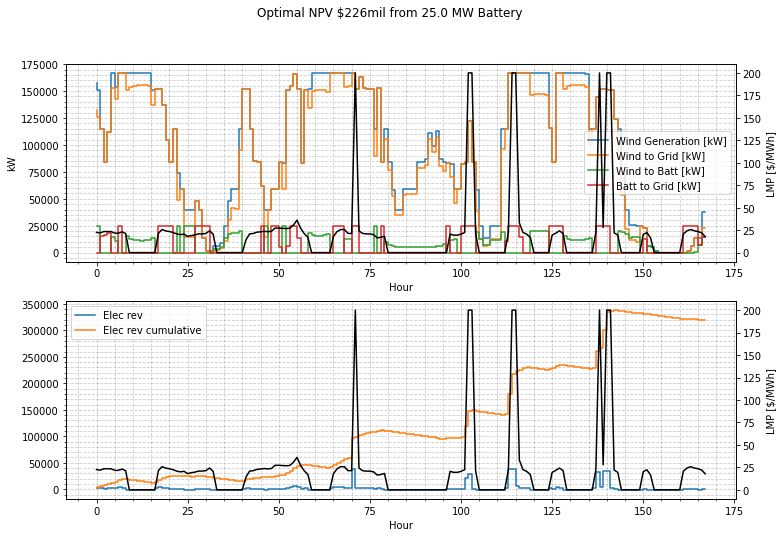

wind mw 200.0
batt mw 25.000000250069238
elec rev 319733.7045604261
annual rev 16626152.637142159
npv 225584716.8798638


In [4]:
from dispatches.models.renewables_case.wind_battery_LMP import wind_battery_optimize

wind_mw, batt_mw, rev, NPV = wind_battery_optimize()

design_outputs['Wind + Batt'] = {
    'wind_mw': wind_mw, 'batt_mw': batt_mw, 'Rev_E': rev, 'NPV': NPV
}

## Wind + PEM + Tank

Assuming existing wind farm of 200 MW

In [ ]:
from dispatches.models.renewables_case.wind_PEM_tank_LMP import wind_pem_tank_optimize

wind_mw, pem_mw, tank_m3, rev_h, rev_e, NPV = wind_pem_tank_optimize()

design_outputs['Wind + PEM + Tank'] = {
    'wind_mw': wind_mw, 'pem_mw': pem_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'tank_m3': tank_m3
}

## Wind + Battery + PEM

Assuming existing wind farm of 200 MW

In [ ]:
from dispatches.models.renewables_case.wind_battery_PEM_LMP import wind_battery_pem_optimize

wind_mw, batt_mw, pem_mw, rev_h, rev_e, NPV = wind_battery_pem_optimize()

design_outputs['Wind + Batt + PEM'] = {
    'wind_mw': wind_mw, 'batt_mw': batt_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'pem_mw': pem_mw
}

## Wind + Battery + PEM + Tank

Assuming existing wind farm of 200 MW

In [ ]:
from dispatches.models.renewables_case.wind_battery_PEM_tank_LMP import wind_battery_pem_tank_optimize

wind_mw, batt_mw, pem_mw, tank_m3, rev_h, rev_e, NPV = wind_battery_pem_tank_optimize()

design_outputs['Wind + Batt + PEM + Tank'] = {
    'wind_mw': wind_mw, 'pem_mw': pem_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'tank_m3': tank_m3, 'batt_mw': batt_mw
}

## Wind + Battery + PEM + Tank + Turbine

Assuming existing wind farm of 200 MW

In [ ]:
from dispatches.models.renewables_case.wind_battery_PEM_tank_turbine_LMP import wind_battery_pem_tank_turb_optimize

wind_mw, batt_mw, pem_mw, tank_m3, turb_mw, rev_h, rev_e, NPV = wind_battery_pem_tank_turb_optimize()

design_outputs['Wind + Batt + PEM + Tank + Turb'] = {
    'wind_mw': wind_mw, 'pem_mw': pem_mw, 'Rev_H': rev_h, 'Rev_E': rev, 'NPV': NPV, 'tank_m3': tank_m3, 'batt_mw': batt_mw, 'turb_mw': turb_mw
}

In [ ]:
df = pd.DataFrame.from_dict(design_outputs, orient='index')
df.insert(2, 'Rev_H', df.pop("Rev_H"))
df
